# Nama : Putri Amelia
# Kelas : Fibonacci
## Script Code Monte Carlo - Definite Integral

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def func(x):
    return 0.5 + np.sin(np.pi * x)

In [5]:
xmin = 0.25
xmax = 1.95

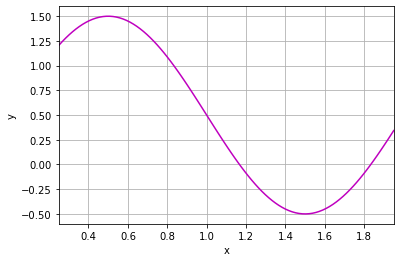

In [6]:
# plot the function
x = np.linspace(xmin, xmax, 100)
y = func(x)

plt.plot(x, y, 'm-')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([xmin, xmax])
plt.grid(True)

In [7]:
# find the integral using `scipy.integrate` function
integrate.quad(func, xmin, xmax)

(0.7606881157593811, 1.3309649938119312e-14)

In [8]:
def integrate_mc(f, xmin, xmax, N, N_init=1000, c=1.05, plot=False):
    """Monte Carlo integration"""
    
    ### find the maximum of f(x) in the range of integral using monte carlo
    xr_init = np.random.uniform(xmin, xmax, N_init)
    yr_init = f(xr_init)
    ymin, ymax = np.min(yr_init), np.max(yr_init)
    ylim = np.max(np.abs([ymin, ymax]))
    
    ### the integral part
    xr = np.random.uniform(xmin, xmax, N)
    yr = c * np.random.uniform(0, ylim, N)
    sign = np.where(f(xr) < 0, -1, 1) # positive or negative section
    yr = sign * yr
    
    insidecurve = np.where(np.abs(yr) <= np.abs(f(xr)), 1, 0)
    result = sign*insidecurve # 0 outside, +1 and -1 inside
    
    integral_result = np.sum(result)/N * (xmax-xmin) * (ylim * c)
    
    ### plot the result
    if plot:
        x = np.linspace(xmin, xmax, 100)
        y = f(x)
        plt.plot(xr[np.where(result ==  1)], yr[np.where(result ==  1)], 'b,')
        plt.plot(xr[np.where(result == -1)], yr[np.where(result == -1)], 'r,')
        plt.plot(xr[np.where(result ==  0)], yr[np.where(result ==  0)], 'k,')
        plt.plot(x, y, 'm-')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim([xmin, xmax])
        plt.grid(True)
    
    return integral_result #, result, xr, yr, ylim

0.7877183242546387

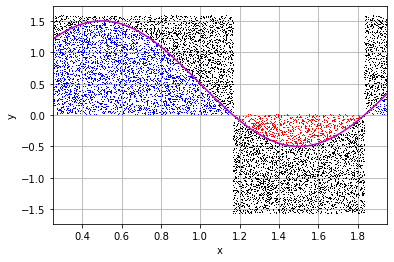

In [9]:
integrate_mc(func, xmin, xmax, N=10000,  plot=True)

(-4.0, 4.440892098500626e-14)


-3.966059365498152

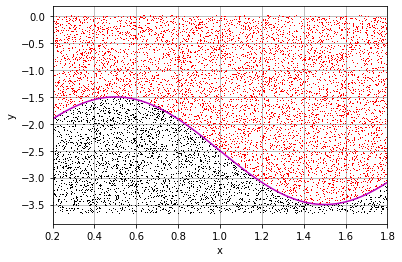

In [10]:
def func2(x):
    return -2.5 + np.sin(np.pi * x)

print(integrate.quad(func2, 0.2, 1.8))
integrate_mc(func2, 0.2, 1.8, N=10000,  plot=True)

(0.40299456487885466, 7.72575924813062e-12)


0.41356975681858116

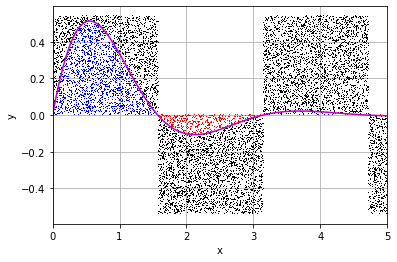

In [11]:
def func2(x):
    return  np.sin(2*x) * np.exp(-x)

print(integrate.quad(func2, 0, 5))
integrate_mc(func2, 0, 5, N=10000,  plot=True)